<left><img width=25% src="img/cornell_tech2.svg"></left>

# Introduction to Statistical Machine Learning

### Oxford ML School

__Volodymyr Kuleshov__<br>Cornell Tech

# Part 1: What is Supervised Machine Learning?

We hear a lot about machine learning (or ML for short) in the news.

<table><tr>
    <td><center><img width=90% src="img/alphago.jpeg"/></center></td>
    <td><center><img src="img/obama2.jpg"/></center></td>    
    <td><center><img width=80% src="img/chatgpt.png"/></center></td>    
</tr></table>    

But what is it, really?

# ML in Everyday Life: Search Engines

You use machine learninng every day when use a search engine.

<center><img src="img/google.png"/></center>

# ML in Everyday Life: Personal Assistants

Machine learning also powers the speech recognition, question answering and other intelligent capabilities of smartphone assistants like Apple Siri.
<table><tr>
    <td><center><img src="img/siri.png"/></center></td>
    <td><center><img src="img/google_assistant.png"/></center></td>
</tr></table>    

# ML in Everyday Life: Spam/Fraud Detection

Machine learning is used in every spam filter, such as in Gmail.
<br>
<center><img src="img/spam.png"/></center>

ML systems are also used by credit card companies and banks to automatically detect fraudulent behavior.

# ML in Everyday Life: Self-Driving Cars

One of the most exciting and cutting-edge uses of machine learning algorithms is in autonomous vehicles.

<center><img width="80%" src="img/waymo.jpg"/></center>

# A Definition of Machine Learning

In 1959, Arthur Samuel defined machine learning as follows.

> Machine learning is a field of study that gives computers the ability to learn without being explicitly programmed.

What does "learn" and "explicitly programmed" mean here? Let's look at an example.

# An Example: Self Driving Cars

A self-driving car system uses dozens of components that include detection of cars, pedestrians, and other objects.
<br>
<center><img width=80% src="img/tesla.jpg"/></center>

# Self Driving Cars: A Rule-Based Algorithm

One way to build a detection system is to write down rules.
<left><img width=50% src="img/tesla_zoom.jpg"/></left>

<!-- <table style="border: 1px"><tr>
    <td><left>One way to build a detection system is to write down rules.</left></td>
    <td><img src="img/tesla_zoom.jpg"/></td>
</tr></table> -->

In [2]:
# pseudocode example for a rule-based classification system
object = camera.get_object()
if object.has_wheels(): # does the object have wheels?
    if len(object.wheels) == 4: return "Car" # four wheels => car    
    elif len(object.wheels) == 2:,
        if object.seen_from_back():
            return "Car" # viewed from back, car has 2 wheels
        else:
            return "Bicycle" # normally, 2 wheels => bicycle
return "Unknown" # no wheels? we don't know what it is

In practice, it's almost impossible for a human to specify all the edge cases.

# Self Driving Cars: Supervised ML Approach

The machine learning approach is to teach a computer how to do detection by showing it many examples of different objects.

<center><img src="img/tesla_data.png"/></center>

No manual programming is needed: the computer learns what defines a pedestrian or a car on its own!

# Revisiting Our Definition of ML

> Machine learning is a field of study that gives computers the ability to learn without being explicitly programmed. (Arthur Samuel, 1959.)

This principle can be applied to countless domains:
medical diagnosis, factory automation, machine translation, and many more!

# Why Machine Learning?

Why is this approach to building software interesting?

* It lets us build practical systems for real-world applications for which other engineering approaches don't work.

* Learning is widely regarded as a key approach towards building general-purpose artificial intelligence systems.

* The science and engineering of machine learning offers insights into human intelligence.

# Applications of Supervised Learning

Many important applications of machine learning are supervised:
* Classifying medical images.
* Translating between pairs of languages.
* Detecting objects in autonomous driving.

# Supervised Learning: Object Detection
We previously saw an example of supervised learning: object detection.
<center><img width=70% src="img/tesla_data.png"/></center>

1. We start by collecting a dataset of labeled objects.
2. We train a model to output accurate predictions on this dataset.
3. When the model sees new, similar data, it will also be accurate.

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 2: Ordinary Least Squares

In practice, there is a more effective way than gradient descent to find linear model parameters.

This method will produce our first non-toy algorithm: Ordinary Least Squares.

# Components of a Supervised Machine Learning Problem

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \underbrace{\text{Dataset}}_\text{Features, Attributes, Targets} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

# Review: The Gradient

The gradient $\nabla_\theta f$ further extends the derivative to multivariate functions $f : \mathbb{R}^d \to \mathbb{R}$, and is defined at a point $\theta_0$ as

$$ \nabla_\theta f (\theta_0) = \begin{bmatrix}
\frac{\partial f(\theta_0)}{\partial \theta_1} \\
\frac{\partial f(\theta_0)}{\partial \theta_2} \\
\vdots \\
\frac{\partial f(\theta_0)}{\partial \theta_d}
\end{bmatrix}.$$

In other words, the $j$-th entry of the vector $\nabla_\theta f (\theta_0)$ is the partial derivative $\frac{\partial f(\theta_0)}{\partial \theta_j}$ of $f$ with respect to the $j$-th component of $\theta$.

# The UCI Diabetes Dataset

In this section, we are going to use the UCI Diabetes Dataset.
* For each patient we have a access to a measurement of their body mass index (BMI) and a quantiative diabetes risk score (from 0-300). 
* We are interested in understanding how BMI affects an individual's diabetes risk.

Text(0, 0.5, 'Diabetes Risk')

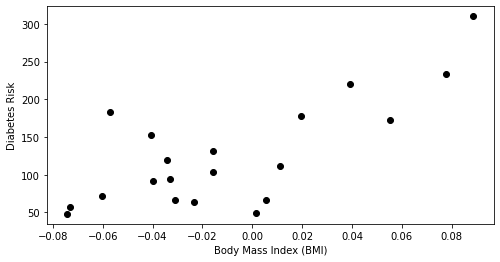

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# add an extra column of onens
X['one'] = 1

# Collect 20 data points
X_train = X.iloc[-20:]
y_train = y.iloc[-20:]

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

# Notation: Design Matrix

<!-- Suppose that we have a dataset of size $n$ (e.g., $n$ patients), indexed by $i=1,2,...,n$. Each $x^{(i)}$ is a vector of $d$ features. -->

Machine learning algorithms are most easily defined in the language of linear algebra. Therefore, it will be useful to represent the entire dataset as one matrix $X \in \mathbb{R}^{n \times d}$, of the form:

$$ X = \begin{bmatrix}
x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_d \\
x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_d \\
\vdots \\
x^{(n)}_1 & x^{(n)}_2 & \ldots & x^{(n)}_d
\end{bmatrix}
=
\begin{bmatrix}
- & (x^{(1)})^\top & - \\
- & (x^{(2)})^\top & - \\
& \vdots & \\
- & (x^{(n)})^\top & - \\
\end{bmatrix}
.$$

We can view the design matrix for the diabetes dataset.

In [37]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,one
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040672,-0.009362,1
423,0.009016,0.050680,-0.039618,0.028758,0.038334,0.073529,-0.072854,0.108111,0.015567,-0.046641,1
424,0.001751,0.050680,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024053,0.023775,1
425,-0.078165,-0.044642,-0.040696,-0.081414,-0.100638,-0.112795,0.022869,-0.076395,-0.020289,-0.050783,1
426,0.030811,0.050680,-0.034229,0.043677,0.057597,0.068831,-0.032356,0.057557,0.035462,0.085907,1


# Notation: Target Vector


Similarly, we can vectorize the target variables into a vector $y \in \mathbb{R}^n$ of the form
$$ y = \begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(n)}
\end{bmatrix}.$$

# Squared Error in Matrix Form

We may fit a linear model by choosing $\theta$ that minimizes the squared error:
$$J(\theta)=\frac{1}{2}\sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$

We can write this sum in matrix-vector form as:
$$J(\theta) = \frac{1}{2} (y-X\theta)^\top(y-X\theta) = \frac{1}{2} \|y-X\theta\|^2,$$
where $X$ is the design matrix and $\|\cdot\|$ denotes the Euclidean norm.

# The Gradient of the Squared Error

We can compute the gradient of the mean squared error as follows.

\begin{align*}
\nabla_\theta J(\theta) 
& = \nabla_\theta \frac{1}{2} (X \theta - y)^\top  (X \theta - y) \\
& = \frac{1}{2} \nabla_\theta \left( (X \theta)^\top  (X \theta) - (X \theta)^\top y - y^\top (X \theta) + y^\top y \right) \\
& = \frac{1}{2} \nabla_\theta \left( \theta^\top  (X^\top X) \theta - 2(X \theta)^\top y \right) \\
& = \frac{1}{2} \left( 2(X^\top X) \theta - 2X^\top y \right) \\
& = (X^\top X) \theta - X^\top y
\end{align*}

We used the facts that $a^\top b = b^\top a$ (line 3), that $\nabla_x b^\top x = b$ (line 4), and that $\nabla_x x^\top A x = 2 A x$ for a symmetric matrix $A$ (line 4).

# Normal Equations

<!-- We know from calculus that a function is minimized when its derivative is set to zero. In our case, our objective function is a (multivariate) quadratic; hence it only has one minimum, which is the global minimum.
 -->
Setting the above derivative to zero, we obtain the *normal equations*:
$$ (X^\top X) \theta = X^\top y.$$

Hence, the value $\theta^*$ that minimizes this objective is given by:
$$ \theta^* = (X^\top X)^{-1} X^\top y.$$

Note that we assumed that the matrix $(X^\top X)$ is invertible; we will soon see a simple way of dealing with non-invertible matrices.

Let's apply the normal equations.

In [21]:
import numpy as np

theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
theta_best_df = pd.DataFrame(data=theta_best[np.newaxis, :], columns=X.columns)
theta_best_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,one
0,-3.888868,204.648785,-64.289163,-262.796691,14003.726808,-11798.307781,-5892.15807,-1136.947646,-2736.597108,-393.879743,155.698998


We can now use our estimate of theta to compute predictions for 3 new data points.

In [22]:
# Collect 3 data points for testing
X_test = X.iloc[:3]
y_test = y.iloc[:3]

# generate predictions on the new patients
y_test_pred = X_test.dot(theta_best)

Let's visualize these predictions.

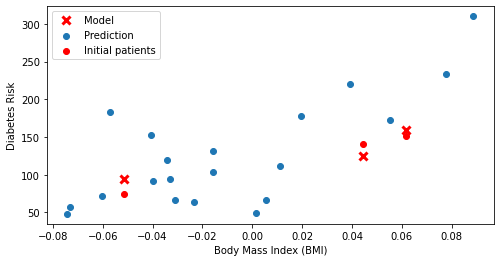

In [23]:
# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(X_train.loc[:, ['bmi']], y_train)
plt.scatter(X_test.loc[:, ['bmi']], y_test, color='red', marker='o')
plt.plot(X_test.loc[:, ['bmi']], y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 3: Non-Linear Least Squares

Ordinary Least Squares can only learn linear relationships in the data. Can we also use it to model more complex relationships?

# Review: Polynomial Functions

Recall that a polynomial of degree $p$ is a function of the form
$$
a_p x^p + a_{p-1} x^{p-1} + ... + a_{1} x + a_0.
$$

Below are some examples of polynomial functions.

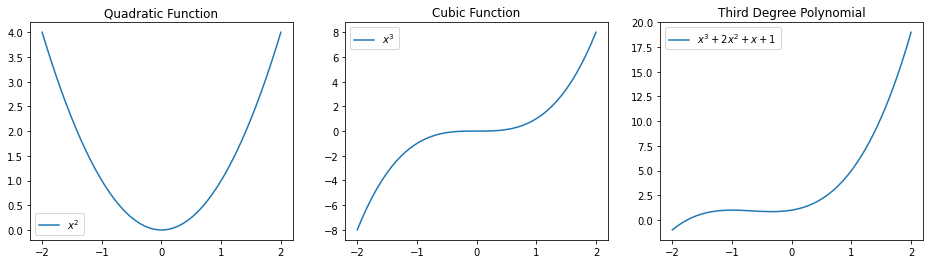

In [24]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(16,4))
x_vars = np.linspace(-2, 2)

plt.subplot('131')
plt.title('Quadratic Function')
plt.plot(x_vars, x_vars**2)
plt.legend(["$x^2$"])

plt.subplot('132')
plt.title('Cubic Function')
plt.plot(x_vars, x_vars**3)
plt.legend(["$x^3$"])

plt.subplot('133')
plt.title('Third Degree Polynomial')
plt.plot(x_vars, x_vars**3 + 2*x_vars**2 + x_vars + 1)
plt.legend(["$x^3 + 2 x^2 + x + 1$"])

# Modeling Non-Linear Relationships With Polynomial Regression

<!-- Note that the set of $p$-th degree polynomials forms a linear model with parameters $a_p, a_{p-1}, ..., a_0$.
This means we can use our algorithms for linear models to learn non-linear features! -->

Specifically, given a one-dimensional continuous variable $x$, we can define the *polynomial feature* function $\phi : \mathbb{R} \to \mathbb{R}^{p+1}$ as
$$ \phi(x) = \begin{bmatrix}
1 \\
x \\
x^2 \\
\vdots \\
x^p
\end{bmatrix}.
$$

The class of models of the form
$$ f_\theta(x) := \sum_{j=0}^p \theta_j x^j = \theta^\top \phi(x) $$
with parameters $\theta$ and polynomial features $\phi$ is the set of $p$-degree polynomials.

* This model is non-linear in the input variable $x$, meaning that we can model complex data relationships.

* It is a linear model as a function of the parameters $\theta$, meaning that we can use our familiar ordinary least squares algorithm to learn these features.

# Diabetes Dataset: A Non-Linear Featurization

Let's now obtain linear features for this dataset.

In [26]:
X_bmi = X_train.loc[:, ['bmi']]

X_bmi_p3 = pd.concat([X_bmi, X_bmi**2, X_bmi**3], axis=1)
X_bmi_p3.columns = ['bmi', 'bmi2', 'bmi3']
X_bmi_p3['one'] = 1
X_bmi_p3.head()

,bmi,bmi2,bmi3,one
422,0.077863,0.006063,0.000472,1
423,-0.039618,0.001570,-0.000062,1
424,0.011039,0.000122,0.000001,1
425,-0.040696,0.001656,-0.000067,1
426,-0.034229,0.001172,-0.000040,1


# Diabetes Dataset: A Polynomial Model

By training a linear model on this featurization of the diabetes set, we can obtain a polynomial model of diabetest risk as a function of BMI.

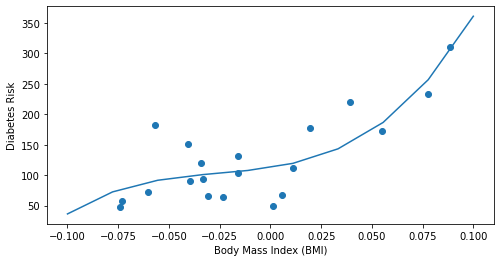

In [27]:
# Fit a linear regression
theta = np.linalg.inv(X_bmi_p3.T.dot(X_bmi_p3)).dot(X_bmi_p3.T).dot(y_train)

# Show the learned polynomial curve
x_line = np.linspace(-0.1, 0.1, 10)
x_line_p3 = np.stack([x_line, x_line**2, x_line**3, np.ones(10,)], axis=1)
y_train_pred = x_line_p3.dot(theta)

plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(X_bmi, y_train)
plt.plot(x_line, y_train_pred)

# Multivariate Polynomial Regression

We can construct non-linear functions of multiple variables by using multivariate polynomials.

For example, a polynomial of degree $2$ over two variables $x_1, x_2$ is a function of the form
<!-- $$
a_{20} x_1^2 + a_{10} x_1 + a_{02} x_2^2 + a_{01} x_2 + a_{22} x_1^2 x_2^2 + a_{21} x_1^2 x_2 + a_{12} x_1 x_2^2 + a_11 x_1 x_2 + a_{00}.
$$ -->
$$
a_{20} x_1^2 + a_{10} x_1 + a_{02} x_2^2 + a_{01} x_2 + a_{11} x_1 x_2 + a_{00}.
$$

In general, a polynomial of degree $p$ over two variables $x_1, x_2$ is a function of the form
$$
f(x_1, x_2) = \sum_{i,j \geq 0 : i+j \leq p} a_{ij} x_1^i x_2^j.
$$

In our two-dimensional example, this corresponds to a feature function $\phi : \mathbb{R}^2 \to \mathbb{R}^6$ of the form
$$ \phi(x) = \begin{bmatrix}
1 \\
x_1 \\
x_1^2 \\
x_2 \\
x_2^2 \\
x_1 x_2
\end{bmatrix}.
$$

The same approach can be used to specify polynomials of any degree and over any number of variables.

# Towards General Non-Linear Features

Any non-linear feature map $\phi(x) : \mathbb{R}^d \to \mathbb{R}^p$ can be used in this way to obtain general models of the form
$$ f_\theta(x) := \theta^\top \phi(x) $$
that are highly non-linear in $x$ but linear in $\theta$.

For example, here is a way of modeling complex periodic functions via a sum of sines and cosines.

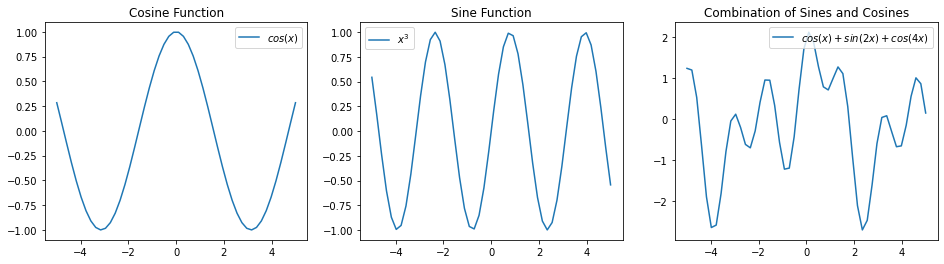

In [28]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(16,4))
x_vars = np.linspace(-5, 5)

plt.subplot('131')
plt.title('Cosine Function')
plt.plot(x_vars, np.cos(x_vars))
plt.legend(["$cos(x)$"])

plt.subplot('132')
plt.title('Sine Function')
plt.plot(x_vars, np.sin(2*x_vars))
plt.legend(["$x^3$"])

plt.subplot('133')
plt.title('Combination of Sines and Cosines')
plt.plot(x_vars, np.cos(x_vars) + np.sin(2*x_vars) + np.cos(4*x_vars))
plt.legend(["$cos(x) + sin(2x) + cos(4x)$"])

<left><img width=25% src="img/cornell_tech2.svg"></left>

# Part 4: Overfitting

Next, we are going to see some limitations of the above approach.

# Polynomials Fit the Data Well

When we switch from linear models to polynomials, we can better fit the data and increase the accuracy of our models.

Let's generate a synthetic dataset for this demonstration.

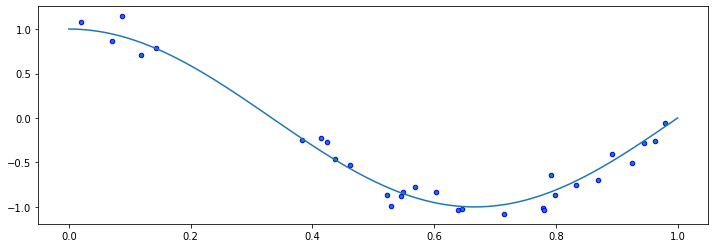

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fn(X) + np.random.randn(n_samples) * 0.1

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, true_fn(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

# Towards Higher-Degree Polynomial Features?

As we increase the complexity of our model class $\mathcal{M}$ to include even higher degree polynomials, we are able to fit the data even better.

What happens if we further increase the degree of the polynomial?

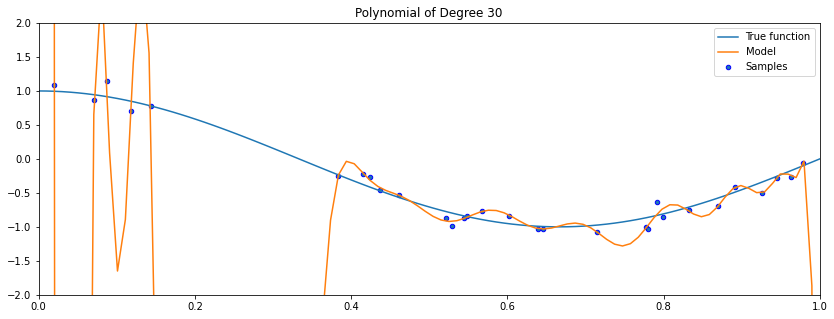

In [10]:
degrees = [30]
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    ax.plot(X_test, true_fn(X_test), label="True function")    
    ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    ax.scatter(X, y, edgecolor='b', s=20, label="Samples")
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.legend(loc="best")
    ax.set_title("Polynomial of Degree {}".format(degrees[i]))

As the degree of the polynomial increases to the size of the dataset, we are increasingly able to fit every point in the dataset.

However, this results in a highly irregular curve: its behavior outside the training set is wildly inaccurate.

# Overfitting

Overfitting is one of the most common failure modes of machine learning.
* A very expressive model (e.g., a high degree polynomial) fits the training dataset perfectly.
* But the model makes highly incorrect predictions outside this dataset, and doesn't generalize.

# Underfitting

A related failure mode is underfitting.

* A small model (e.g. a straight line), will not fit the training data well.
* Therefore, it will also not be accurate on new data.

<!-- __Underfitting__: On one hand, if the model is too small (like the linear model in the above example), it will not generalize well to unseen data because it is not sufficiently complex to fit the true structure of the dataset.

__Overfitting__: On the other hand, if the model is too expressive (like a high degree polynomial), we are going to fit the training dataset perfectly; however, the model will make wildly incorrect prediction at points right outside this dataset, and will also not generalize well to unseen data. -->

Finding the tradeoff between overfitting and underfitting is one of the main challenges in applying machine learning.

# Overfitting vs. Underfitting: Evaluation

We can diagnose overfitting and underfitting by measuring performance on a separate held out dataset (not used for training).
* If training perforance is __high__ but holdout performance is __low__, we are overfitting.
* If training perforance is __low__ and holdout performance is __low__, we are underfitting.

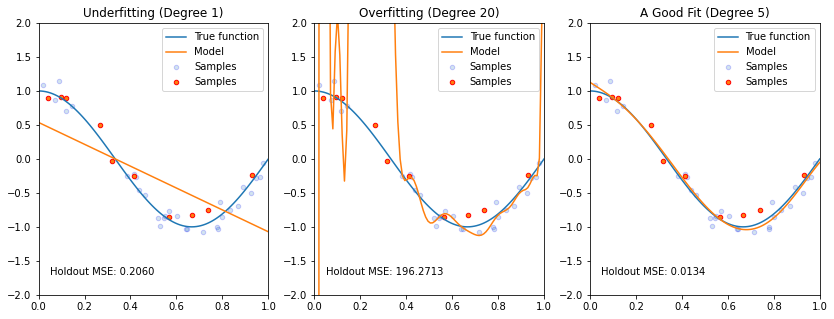

In [11]:
degrees = [1, 20, 5]
titles = ['Underfitting', 'Overfitting', 'A Good Fit']
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    ax.plot(X_test, true_fn(X_test), label="True function")    
    ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    ax.scatter(X, y, edgecolor='b', s=20, label="Samples", alpha=0.2)
    ax.scatter(X_holdout[::3], y_holdout[::3], edgecolor='r', s=20, label="Samples")
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.legend(loc="best")
    ax.set_title("{} (Degree {})".format(titles[i], degrees[i]))
    ax.text(0.05,-1.7, 'Holdout MSE: %.4f' % ((y_holdout-pipeline.predict(X_holdout[:, np.newaxis]))**2).mean())

# How to Fix Underfitting

What if our model doesn't fit the training set well? Try the following:
* Create richer features that will make the dataset easier to fit.
* Use a more expressive model family (higher degree polynomials)
* Try to improve your optimization algorithm

# How to Fix Overfitting

We will see many ways of dealing with overftting, but here are some ideas:
* Use a simpler model family (linear models vs. neural nets)
* Keep the same model, but collect more training data
* Modify the training process to penalize overly complex models.

# Datasets for Model Development

When developing machine learning models, the first step is to usually split the data into three sets:
* __Training set__: Data on which we train our algorithms.
* __Development set__ (validation or holdout set): Data used for tuning algorithms.
* __Test set__: Data used to evaluate the final performance of the model.

# Model Development Workflow

The typical way in which these datasets are used is:
1. __Training:__ Try a new model and fit it on the training set.

2. __Model Selection__: Estimate performance on the development set using metrics. Based on results, try a new model idea in step #1.

3. __Evaluation__: Finally, estimate real-world performance on test set.

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 5: Regularization

We will now see a very important way to reduce overfitting: regularization.

# Regularization: Intuition

The idea of regularization is to penalize complex models that may overfit the data.

In the previous example, a less complex would rely less on polynomial terms of high degree.

# Regularization: Definition

The idea of regularization is to train models with an augmented objective $J : \mathcal{M} \to \mathbb{R}$ defined over a training dataset $\mathcal{D}$ of size $n$ as

$$J(f) = \underbrace{\frac{1}{n} \sum_{i=1}^n L(y^{(i)}, f(x^{(i)}))}_\text{Learning Objective} + \underbrace{\lambda \cdot R(f)}_\text{New Regularization Term}$$

* The regularizer $R : \mathcal{M} \to \mathbb{R}$ penalizes models that are complex.

* The hyperparameter $\lambda > 0$ controls the strength of the regularizer.

Let's dissect the components of this objective:

$$J(f) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, f(x^{(i)})) + \lambda \cdot R(f).$$

* A loss function $L(y, f(x))$ such as the mean squared error.

* A regularizer $R : \mathcal{M} \to \mathbb{R}$ that penalizes models that are overly complex.

* A regularization parameter $\lambda > 0$, which controls the strength of the regularizer.

When the model $f_\theta$ is parametrized by parameters $\theta$, we also use the following notation:

$$J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, f_\theta(x^{(i)})) + \lambda \cdot R(\theta).$$

# L2 Regularization: Definition

How can we define a regularizer $R: \mathcal{M} \to \mathbb{R}$ to control the complexity of a model $f \in \mathcal{M}$?

In the context of linear models $f_\theta(x) = \theta^\top x$, a widely used approach is L2 regularization, which defines the following objective:
$$J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, \theta^\top x^{(i)}) + \frac{\lambda}{2} \cdot ||\theta||_2^2.$$

Let's dissect the components of this objective.
$$J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, \theta^\top x^{(i)}) + \frac{\lambda}{2} \cdot ||\theta||_2^2.$$

* The regularizer $R : \Theta \to \mathbb{R}$ is the function 
$R(\theta) = ||\theta||_2^2 = \sum_{j=1}^d \theta_j^2.$ 
This is also known as the L2 norm of $\theta$.

* The regularizer penalizes large parameters. This prevents us from relying on any single feature and penalizes very irregular solutions.

* L2 regularization can be used with most models (linear, neural, etc.)

# L2 Regularization for Polynomial Regression

Let's consider an application to the polynomial model we have seen so far. Given polynomial features $\phi(x)$, we optimize the following objective:

$$ J(\theta) = \frac{1}{2n} \sum_{i=1}^n \left( y^{(i)} - \theta^\top \phi(x^{(i)}) \right)^2 + \frac{\lambda}{2} \cdot ||\theta||_2^2. $$


We implement regularized and polynomial regression of degree 15 on three random training sets sampled from the same distribution.

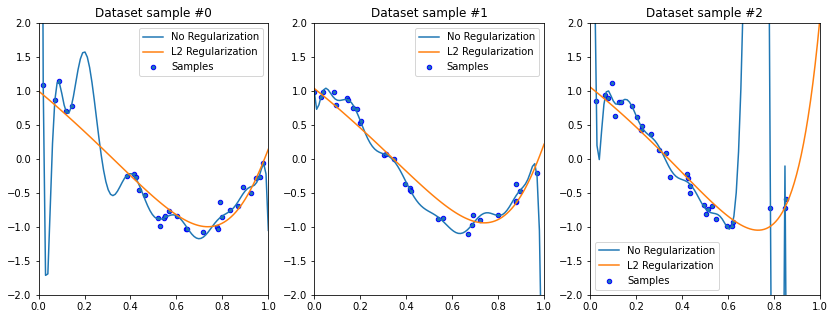

In [13]:
from sklearn.linear_model import Ridge

degrees = [15, 15, 15]
plt.figure(figsize=(14, 5))
for idx, i in enumerate(range(len(degrees))):
    # sample a dataset
    np.random.seed(idx)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = true_fn(X) + np.random.randn(n_samples) * 0.1

    # fit a least squares model
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    
    # fit a Ridge model
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = Ridge(alpha=0.1) # sklearn uses alpha instead of lambda
    pipeline2 = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline2.fit(X[:, np.newaxis], y)    

    # visualize results
    ax = plt.subplot(1, len(degrees), i + 1)
    # ax.plot(X_test, true_fn(X_test), label="True function")    
    ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="No Regularization")
    ax.plot(X_test, pipeline2.predict(X_test[:, np.newaxis]), label="L2 Regularization")    
    ax.scatter(X, y, edgecolor='b', s=20, label="Samples")
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.legend(loc="best")
    ax.set_title("Dataset sample #{}".format(idx))

In order to define a very irregular function, we need very large polynomial weights.

Forcing the model to use small weights prevents it from learning irregular functions.

In [14]:
print('Non-regularized weights of the polynomial model need to be large to fit every point:')
print(pipeline.named_steps['lr'].coef_[:4])
print()

print('By regularizing the weights to be small, we force the curve to be more regular:')
print(pipeline2.named_steps['lr'].coef_[:4])

Non-regularized weights of the polynomial model need to be large to fit every point:
[-3.02370887e+03  1.16528860e+05 -2.44724185e+06  3.20288837e+07]

By regularizing the weights to be small, we force the curve to be more regular:
[-2.70114811 -1.20575056 -0.09210716  0.44301292]


# Normal Equations for Regularized Models

How, do we fit regularized models? As in the linear case, we can do this easily by deriving generalized normal equations! 

Let $L(\theta) = \frac{1}{2} (X \theta - y)^\top  (X \theta - y)$ be our least squares objective. We can write the L2-regularized objective as:
$$ J(\theta) = \frac{1}{2} (X \theta - y)^\top  (X \theta - y) + \frac{1}{2} \lambda ||\theta||_2^2 $$

This allows us to derive the gradient as follows:
\begin{align*}
\nabla_\theta J(\theta) 
& = \nabla_\theta \left( \frac{1}{2} (X \theta - y)^\top  (X \theta - y) + \frac{1}{2} \lambda ||\theta||_2^2 \right) \\
& = \nabla_\theta \left( L(\theta) + \frac{1}{2} \lambda \theta^\top \theta \right) \\
& = \nabla_\theta L(\theta) + \lambda \theta \\
& = (X^\top X) \theta - X^\top y + \lambda \theta \\
& = (X^\top X + \lambda I) \theta - X^\top y
\end{align*}

We used the derivation of the normal equations for least squares to obtain $\nabla_\theta L(\theta)$ as well as the fact that: $\nabla_x x^\top x = 2 x$.

We can set the gradient to zero to obtain normal equations for the Ridge model:
$$ (X^\top X + \lambda I) \theta = X^\top y. $$

Hence, the value $\theta^*$ that minimizes this objective is given by:
$$ \theta^* = (X^\top X + \lambda I)^{-1} X^\top y.$$

Note that the matrix $(X^\top X + \lambda I)$ is always invertible, which addresses a problem with least squares that we saw earlier.

# How to Choose $\lambda$? Hyperparameter Search

We refer to $\lambda$ as a __hyperparameter__, because it's a high-level parameter that controls other parameters.

How do we choose $\lambda$?
* We select the $\lambda$ with the best performance on the development set.
* If we don't have enough data, we select $\lambda$ by cross-validation.